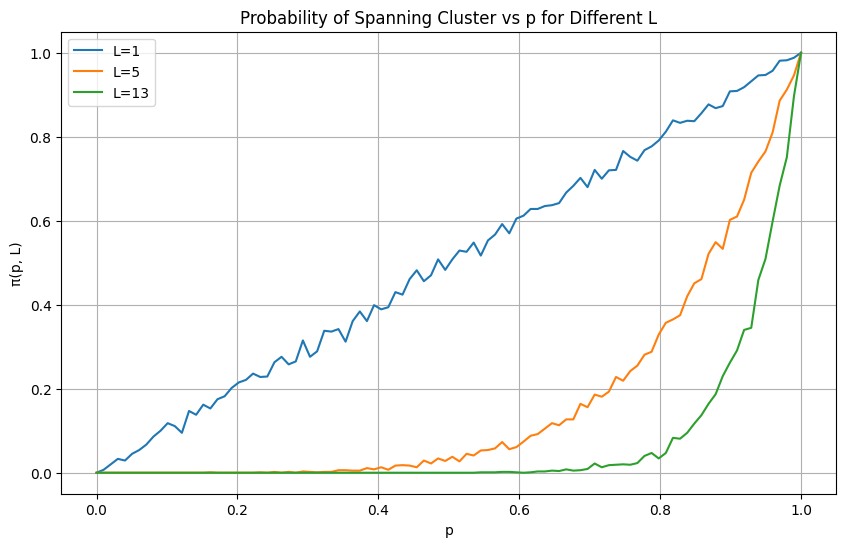

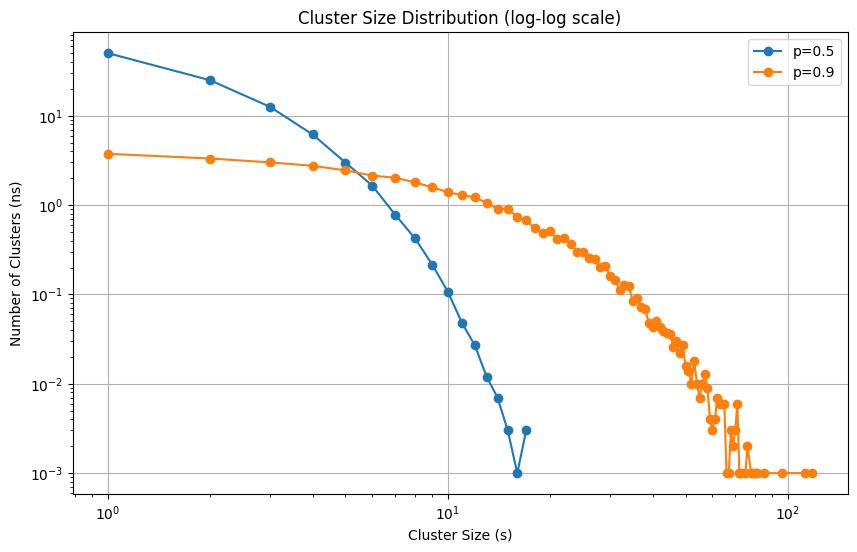

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

def create_lattice(L, p):
    """Create a 1D lattice of size L with occupation probability p."""
    return np.random.rand(L) < p

def has_spanning_cluster(lattice):
    """Check if there is a spanning cluster in the lattice."""
    labeled, num_features = label(lattice)
    if num_features == 0:
        return False
    for i in range(1, num_features + 1):
        if np.any(labeled == i) and np.all(labeled == i):
            return True
    return False

def calculate_pi(p, L, num_samples=1000):
    """Calculate the probability of having a spanning cluster for given p and L."""
    spanning_count = 0
    for _ in range(num_samples):
        lattice = create_lattice(L, p)
        if has_spanning_cluster(lattice):
            spanning_count += 1
    return spanning_count / num_samples

def calculate_ns(lattice):
    """Calculate the number of clusters of size s."""
    labeled, num_features = label(lattice)
    cluster_sizes = np.bincount(labeled.ravel())
    return cluster_sizes[1:]

def plot_pi_vs_p(L_values, p_values, num_samples=1000):
    """Plot π(p, L) as a function of p for various L."""
    plt.figure(figsize=(10, 6))
    for L in L_values:
        pi_values = [calculate_pi(p, L, num_samples) for p in p_values]
        plt.plot(p_values, pi_values, label=f'L={L}')
    plt.xlabel('p')
    plt.ylabel('π(p, L)')
    plt.title('Probability of Spanning Cluster vs p for Different L')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_ns_vs_s(L, p_values, num_samples=1000):
    """Plot ns vs s for various values of p."""
    plt.figure(figsize=(10, 6))
    for p in p_values:
        ns_values = []
        for _ in range(num_samples):
            lattice = create_lattice(L, p)
            ns = calculate_ns(lattice)
            ns_values.extend(ns)
        s_values, counts = np.unique(ns_values, return_counts=True)
        plt.loglog(s_values, counts / num_samples, 'o-', label=f'p={p}')
    plt.xlabel('Cluster Size (s)')
    plt.ylabel('Number of Clusters (ns)')
    plt.title('Cluster Size Distribution (log-log scale)')
    plt.legend()
    plt.grid(True)
    plt.show()


L_values = [1, 5, 13]  
p_values = np.linspace(0, 1, 100)  
num_samples = 1000 


plot_pi_vs_p(L_values, p_values, num_samples)

L_fixed = 400
p_values_ns = [0.5, 0.9]
plot_ns_vs_s(L_fixed, p_values_ns, num_samples)